[![AnalyticsDojo](https://github.com/rpi-techfundamentals/spring2019-materials/blob/master/fig/final-logo.png?raw=1)](http://rpi.analyticsdojo.com)
<center><h1>Regression with Tensorflow/Keras </h1></center>
<center><h3><a href = 'http://rpi.analyticsdojo.com'>rpi.analyticsdojo.com</a></h3></center>

# Regression with Tensorflow/Keras

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [20]:
!wget https://raw.githubusercontent.com/rpi-techfundamentals/spring2019-materials/master/input/boston_test.csv && wget https://raw.githubusercontent.com/rpi-techfundamentals/spring2019-materials/master/input/boston_train.csv

--2021-11-22 20:13:00--  https://raw.githubusercontent.com/rpi-techfundamentals/spring2019-materials/master/input/boston_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451405 (441K) [text/plain]
Saving to: ‘boston_test.csv.1’

boston_test.csv.1   100%[===================>] 440.83K  --.-KB/s    in 0.03s   

2021-11-22 20:13:00 (16.0 MB/s) - ‘boston_test.csv.1’ saved [451405/451405]

--2021-11-22 20:13:00--  https://raw.githubusercontent.com/rpi-techfundamentals/spring2019-materials/master/input/boston_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent

In [21]:
train = pd.read_csv("boston_train.csv")
test = pd.read_csv("boston_test.csv")

In [22]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

### Data preprocessing: 
We're not going to do anything fancy here: 
 
- First I'll transform the skewed numeric features by taking log(feature + 1) - this will make the features more normal    
- Create Dummy variables for the categorical features    
- Replace the numeric missing values (NaN's) with the mean of their respective columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd493f5f810>,
      dtype=object)

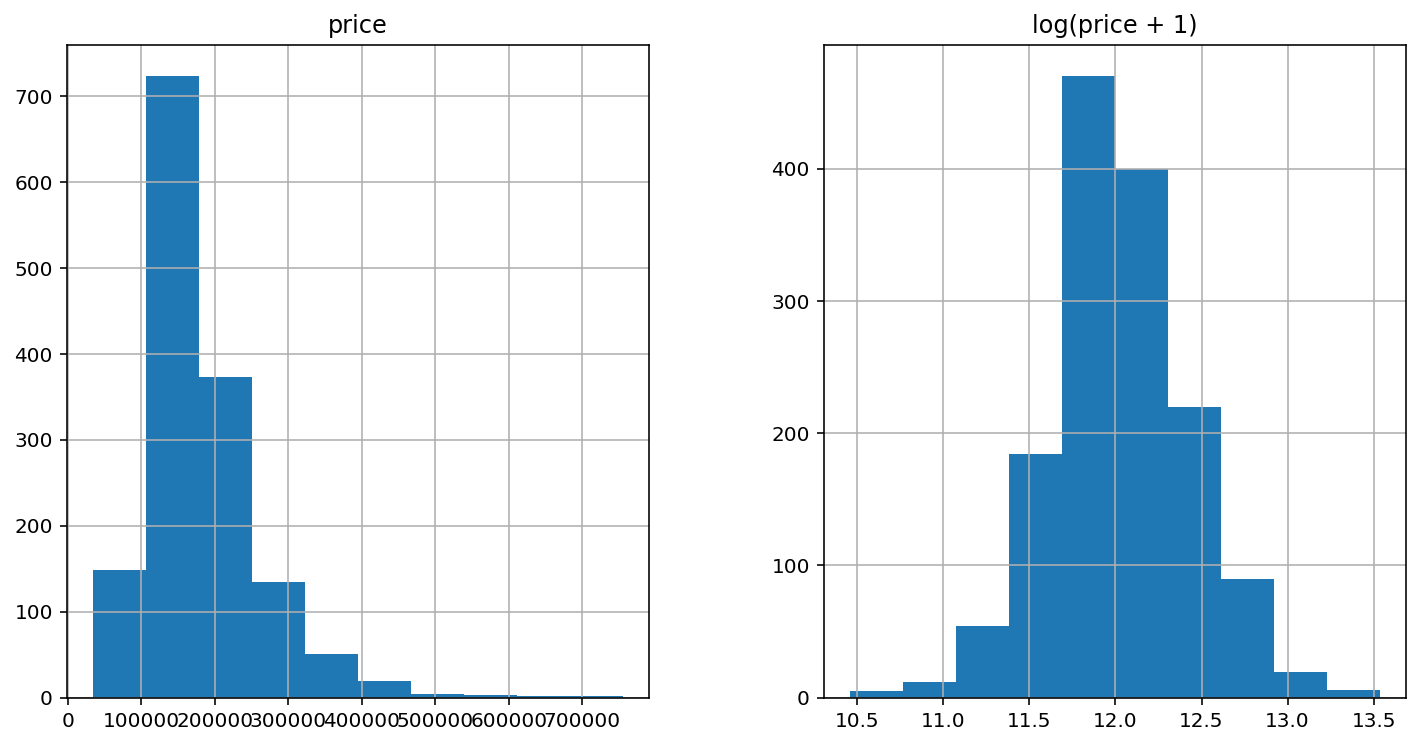

In [24]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [25]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [26]:
all_data = pd.get_dummies(all_data)

In [27]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [28]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y_train = train.SalePrice


### Models Deep Learning Models

Now we are going to use Deep Learning models

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
import tensorflow as tf

#Create our model using sequential mode
model = Sequential()
model.add(tf.keras.layers.Normalization(axis=-1))
model.add(Dense(units=1))
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

model.fit( X_train, y_train, epochs=100, verbose=2, validation_split = 0.2)
model.summary()

Epoch 1/100
37/37 - 1s - loss: 84.2431 - val_loss: 58.3623 - 578ms/epoch - 16ms/step
Epoch 2/100
37/37 - 0s - loss: 45.1115 - val_loss: 50.3736 - 67ms/epoch - 2ms/step
Epoch 3/100
37/37 - 0s - loss: 71.6103 - val_loss: 75.6726 - 72ms/epoch - 2ms/step
Epoch 4/100
37/37 - 0s - loss: 76.4996 - val_loss: 123.4437 - 67ms/epoch - 2ms/step
Epoch 5/100
37/37 - 0s - loss: 84.0996 - val_loss: 109.7441 - 89ms/epoch - 2ms/step
Epoch 6/100
37/37 - 0s - loss: 81.2439 - val_loss: 62.5581 - 87ms/epoch - 2ms/step
Epoch 7/100
37/37 - 0s - loss: 81.4034 - val_loss: 118.9964 - 83ms/epoch - 2ms/step
Epoch 8/100
37/37 - 0s - loss: 70.3809 - val_loss: 32.2555 - 83ms/epoch - 2ms/step
Epoch 9/100
37/37 - 0s - loss: 77.6283 - val_loss: 4.6546 - 78ms/epoch - 2ms/step
Epoch 10/100
37/37 - 0s - loss: 74.2797 - val_loss: 4.2387 - 88ms/epoch - 2ms/step
Epoch 11/100
37/37 - 0s - loss: 53.4591 - val_loss: 55.8753 - 81ms/epoch - 2ms/step
Epoch 12/100
37/37 - 0s - loss: 80.6842 - val_loss: 21.7650 - 81ms/epoch - 2ms/ste

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
import tensorflow as tf

def r2(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

#Create our model using sequential mode
model = Sequential()
model.add(tf.keras.layers.Normalization(axis=-1))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=[r2])

model.fit( X_train, y_train, epochs=100, verbose=2, validation_split = 0.2)
model.summary()

Epoch 1/100
37/37 - 1s - loss: 15.3670 - r2: -2.5609e+03 - val_loss: 11.4084 - val_r2: -1.4557e+03 - 634ms/epoch - 17ms/step
Epoch 2/100
37/37 - 0s - loss: 8.8434 - r2: -8.9788e+02 - val_loss: 7.5931 - val_r2: -7.7564e+02 - 83ms/epoch - 2ms/step
Epoch 3/100
37/37 - 0s - loss: 5.3753 - r2: -3.6261e+02 - val_loss: 3.4270 - val_r2: -1.5167e+02 - 77ms/epoch - 2ms/step
Epoch 4/100
37/37 - 0s - loss: 1.8804 - r2: -4.7014e+01 - val_loss: 0.6656 - val_r2: -5.1043e+00 - 86ms/epoch - 2ms/step
Epoch 5/100
37/37 - 0s - loss: 0.7335 - r2: -5.6660e+00 - val_loss: 0.9058 - val_r2: -7.2742e+00 - 71ms/epoch - 2ms/step
Epoch 6/100
37/37 - 0s - loss: 0.9984 - r2: -9.7985e+00 - val_loss: 0.8362 - val_r2: -6.6092e+00 - 78ms/epoch - 2ms/step
Epoch 7/100
37/37 - 0s - loss: 0.7161 - r2: -5.0511e+00 - val_loss: 0.5398 - val_r2: -2.8835e+00 - 72ms/epoch - 2ms/step
Epoch 8/100
37/37 - 0s - loss: 0.7434 - r2: -5.6320e+00 - val_loss: 1.3700 - val_r2: -1.7203e+01 - 70ms/epoch - 2ms/step
Epoch 9/100
37/37 - 0s - los

In [31]:
# Alternate Sequential syntax, with some additional data
import tensorflow as tf
altmodel = tf.keras.Sequential([
    tf.keras.layers.Normalization(axis=-1),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(units=1),
])
altmodel.compile(loss='mean_absolute_error', optimizer='adam', metrics=[r2])
altmodel.fit( X_train, y_train, epochs=100, verbose=2, validation_split = 0.2)
altmodel.summary()

Epoch 1/100
37/37 - 1s - loss: 84.8092 - r2: -1.1173e+05 - val_loss: 11.4135 - val_r2: -1.2811e+03 - 836ms/epoch - 23ms/step
Epoch 2/100
37/37 - 0s - loss: 20.3638 - r2: -4.6148e+03 - val_loss: 5.4903 - val_r2: -2.8657e+02 - 93ms/epoch - 3ms/step
Epoch 3/100
37/37 - 0s - loss: 8.0143 - r2: -8.2053e+02 - val_loss: 1.5941 - val_r2: -3.9266e+01 - 114ms/epoch - 3ms/step
Epoch 4/100
37/37 - 0s - loss: 3.2177 - r2: -1.1656e+02 - val_loss: 1.3196 - val_r2: -1.5622e+01 - 104ms/epoch - 3ms/step
Epoch 5/100
37/37 - 0s - loss: 2.2120 - r2: -5.3163e+01 - val_loss: 0.4359 - val_r2: -1.2574e+00 - 110ms/epoch - 3ms/step
Epoch 6/100
37/37 - 0s - loss: 2.0493 - r2: -4.9036e+01 - val_loss: 1.5053 - val_r2: -2.0572e+01 - 99ms/epoch - 3ms/step
Epoch 7/100
37/37 - 0s - loss: 2.0006 - r2: -4.4688e+01 - val_loss: 0.8407 - val_r2: -6.0450e+00 - 102ms/epoch - 3ms/step
Epoch 8/100
37/37 - 0s - loss: 1.9508 - r2: -4.2347e+01 - val_loss: 0.7611 - val_r2: -4.5411e+00 - 100ms/epoch - 3ms/step
Epoch 9/100
37/37 - 0s